# Machine Learning Models


-----
## Overview

### Supervised VS Unsupervised Learning

1. Supervised Learning: In supervised machine learning, a model makes predictions or decisions based on past or labeled data.
2. Unsupervised Learning: In unsupervised learning, we don't have labeled data. A model can identify patterns, anomalies, and relationships in the input data.
   1. Clustering
   2. Association Rule Mining
   3. Auto-encoders
   4. Anomaly Detection
3. Reinforcement Learning: Using reinforcement learning, the model can learn based on the rewards it received for its previous action.

### Classification VS Regression

1. Classification: The target attribute $y$ is a discrete variable, such as a class label.
2. Regression: The target attribute $y$ is a continuous variable, such as a real number.

-----
## Linear Regression

Linear regression is a linear model, i.e. a model that assumes a linear relationship between the input variables (x) and the single output variable (y).

$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

-----
## Naive Bayes

Bayes' theorem formula: $P(A|B) = P(B|A) * P(A) / P(B)$

The Naive Bayes method is a supervised learning algorithm, it is naive since it makes assumptions by applying Bayes’ theorem that all attributes are independent of each other.

1. Learn the prior probabilities of each class, that is, the probability that a new observation belongs to each class. $P(A)$, $P(B)$
2. Learn the likelihoods of each feature for each class, that is, the probability that a new observation has a particular value for a feature given that it belongs to a particular class. $P(B|A)$
3. Compute the posterior probability of each class for a new observation, that is, the probability that the new observation belongs to each class given the values of its features.

-----
## Principal component analysis (PCA)

Principal component analysis (PCA) is most commonly used for dimension reduction. 

1. Standardize the data
2. Compute the covariance matrix
3. Compute eigen vectors of the covariance matrix
4. Compute the explained variance and select N components
5. Transform Data using eigen vectors
6. Invert PCA and Reconstruct original data

-----
## Logistic Regression

Logistic regression is a classification model that in its basic form uses a **logistic function** to model a **binary dependent variable**. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

$$P(y=1|x) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x)}}$$

### Can logistic regression use for more than 2 classes?

    No, by default logistic regression is a binary classifier, so it cannot be applied to more than 2 classes. However, it can be extended for solving multi-class classification problems (multinomial logistic regression)

### Derivation of Gradient for Logistic Regression

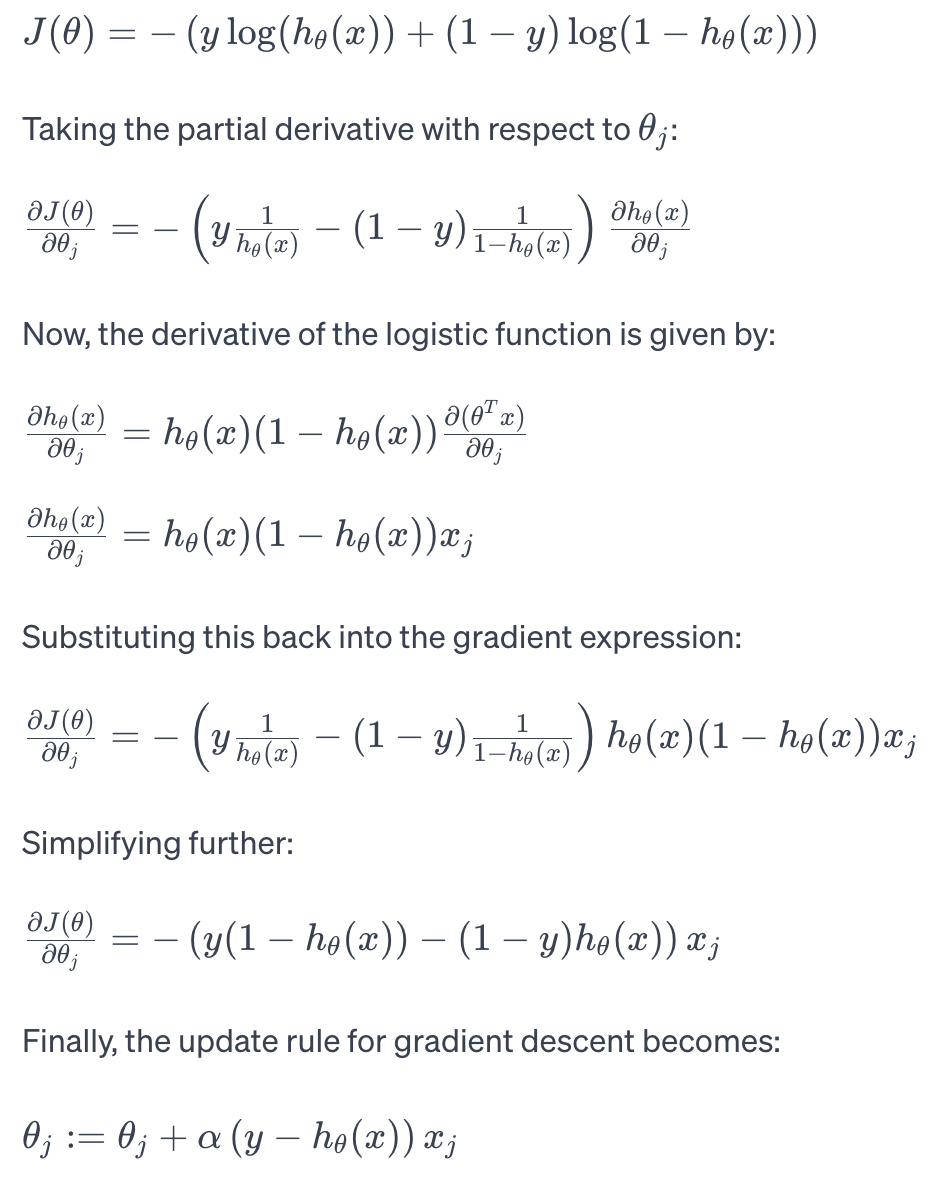


## 6. K-Nearest Neighbors(KNN)

KNN is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space.

1. Step1: Choose K value
2. Step2: For each data point in the data:
   1. Find the Euclidean distance to all training data samples
   2. Store the distances on an ordered list and sort it
   3. Choose the top K entries from the sorted list
3. Step3: Label the test point based on the majority of classes present in the selected points

In [ ]:
from math import sqrt

def KNN(train, test_row, num_neighbors):
    def distance(row1, row2):
        dist = 0.0
        for i in range(len(row1)-1):
            dist += (row1[i] - row2[i])**2
        return sqrt(dist)

    # get neighbors
    distances = []
    for train_row in train:
        dist = distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda x: x[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    # make a classification prediction with neighbors
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction


# Test distance function
dataset = [
    [2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
prediction = KNN(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

# reference: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

: 

## 7. K-Means Clustering

1. Randomly assign each data point to a cluster
2. Determine the cluster centroid coordinates
3. Determine the distances of each data point to the centroids and re-assign each point to the closest cluster centroid based upon minimum distance
4. Calculate cluster centroids again
5. Repeat steps 4 and 5 until we reach global optima where no improvements are possible and no switching of data points from one cluster to other.

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
 
#Function to implement steps given in previous section
def K_means(x, k, no_of_iterations):
    idx = np.random.choice(len(x), k)
    # Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    # Finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
label = K_means(df, 10,10)
print(label)

# reference: https://www.askpython.com/python/examples/k-means-clustering-from-scratch

: 

## 8. Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both **classification or regression challenges**.

A Support Vector Machine (SVM) is an algorithm that tries to **fit a line (or plane or hyperplane) between the different classes** that **maximizes the distance** from the line to the points of the classes.

What are the different kernels in SVM?

1. Linear kernel - used when data is linearly separable.
2. Polynomial kernel - When you have discrete data that has no natural notion of smoothness.
3. Radial basis kernel - Create a decision boundary able to do a much better job of separating two classes than the linear kernel.
4. Sigmoid kernel - used as an activation function for neural networks.

## 9. Ensemble Learning

Ensemble is a machine learning concept, the basic idea is to learn a set of classifiers (experts) and to allow them to vote.

Bagging and Boosting are two types of Ensemble Learning.

The main difference between these learning methods is the method of training. In bagging, data scientists improve the accuracy of weak learners by **training several of them at once on multiple datasets**. In contrast, **boosting trains weak learners one after another**.

1. What is bagging and boosting?
   1. Bagging is democracy based politics for less variance
      1. Step 1: **Multiple subsets** are created from the original data set with equal tuples, selecting observations with replacement.
      2. Step 2: A base model is created on each of these subsets.
      3. Step 3: Each model is learned in parallel with each training set and independent of each other.
      4. Step 4: The final predictions are determined by **combining the predictions from all the models**.
   2. Bagging is elite based politics for less bias
      1. Step 1: Initialize the dataset and assign equal weight to each of the data point.
      2. Step 2: Provide this as input to the model and identify the wrongly classified data points.
      3. Step 3: **Increase the weight of the wrongly classified data points and decrease the weights of correctly classified data points**. And then normalize the weights of all data points.
      4. Step 4: Loop until got required results.

2. What are the types of boosting?
   1. Adaptive Boosting (AdaBoost) is a boosting algorithm that uses a **weighted majority algorithm** to combine several weak classifiers into a strong classifier.
   2. Gradient Boosting is a boosting algorithm that uses a **gradient descent algorithm** to combine several weak classifiers into a strong classifier.
   3. Extreme Gradient Boosting (XGBoost) improves gradient boosting for computational speed and scale in several ways.

## 10. Decision Tree and Random Forest

### 10.1 Decision Tree

Decision trees are data structures in machine learning that work by dividing the dataset into smaller and smaller subsets based on their features.

Decision tree VS Neural Network:

1. **Interpretability ==> Decision Tree**: Decision trees are highly interpretable, as the logic behind the predictions is easy to understand and trace. Neural networks, on the other hand, are often considered "black boxes" because their internal workings are difficult to interpret. If interpretability is an important consideration, a decision tree might be a better choice.
3. **Non-linearity ==> Neural Network**: Decision trees are suitable for problems with simple, linear relationships between inputs and outputs, while neural networks are better suited for problems with complex, non-linear relationships. If the relationship between the input and output variables is non-linear, a neural network would be a better choice.
4. **Huge Number of features ==> Neural Network**: Decision trees are prone to overfitting when the number of features is very large, whereas neural networks can handle large numbers of features, but they require a large amount of data to do so. If the number of features is very large, a neural network would be a better choice.
5. **Speed ==> Decision Tree**: Decision trees are relatively fast to train and predict, while neural networks can be quite computationally expensive to train and predict. If speed is an important consideration, a decision tree might be a better choice.

### 10.2 Random Forest

Like bagging and boosting, random forest works by combining a set of other tree models. Random forest builds a tree from a random sample of the columns in the test data.

Here’s are the steps how a random forest creates the trees:

- Take a sample size from the training data.
- Begin with a single node.
- Run the following algorithm, from the start node:
    - If the number of observations is less than node size then stop.
    - Select random variables.
    - Find the variable that does the “best” job of splitting the observations.
    - Split the observations into two nodes.
    - Call step `a` on each of these nodes.



What parameters are most important for tree-based learners?

1. max_depth - This is the maximum depth per tree. This adds complexity but at the benefit of boosting performance.
2. learning_rate - This determines step size at each iteration. A lower learning rate slows computation, but increases the chance of reaching a model closer to theoptimum.
3. n_estimators - This refers to the number of trees in an ensemble, or the number of boosting rounds.
4. subsample - This is the fraction of observations to be sampled for each tree.

In [ ]:
import pandas as pd
from itertools import permutations

def random_forest(new_point, data):
    data = pd.DataFrame(data)
    features = data.drop('Target',axis=1).columns
    all_permutations = permutations(features)
    votes = []
    for permutation in all_permutations:
        X = data
        for col, i in zip(features,new_point):
            X = X[X[col] == i].drop(col,axis=1)
        vote = X.mode().values[0]
        if not pd.isna(vote):
            votes.append(vote)
    return int(pd.DataFrame(votes).mode().values[0])

new_point = [1, 1, 0, 0]
data = {'Var1': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 1.0, 9: 0.0, 10: 0.0, 11: 1.0, 12: 0.0, 13: 0.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 0.0, 19: 1.0, 20: 1.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 1.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 1.0, 30: 0.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 1.0, 40: 1.0, 41: 0.0, 42: 0.0, 43: 1.0, 44: 0.0, 45: 1.0, 46: 0.0, 47: 0.0, 48: 1.0, 49: 1.0}, 'Var2': {0: 0.0, 1: 0.0, 2: 1.0, 3: 1.0, 4: 0.0, 5: 1.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 1.0, 10: 1.0, 11: 0.0, 12: 1.0, 13: 0.0, 14: 1.0, 15: 0.0, 16: 1.0, 17: 0.0, 18: 0.0, 19: 1.0, 20: 0.0, 21: 1.0, 22: 1.0, 23: 0.0, 24: 1.0, 25: 0.0, 26: 1.0, 27: 0.0, 28: 1.0, 29: 0.0, 30: 0.0, 31: 1.0, 32: 1.0, 33: 0.0, 34: 1.0, 35: 0.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 0.0, 42: 1.0, 43: 1.0, 44: 0.0, 45: 0.0, 46: 1.0, 47: 0.0, 48: 1.0, 49: 1.0}, 'Var3': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 1.0, 5: 1.0, 6: 0.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 1.0, 14: 0.0, 15: 0.0, 16: 1.0, 17: 0.0, 18: 1.0, 19: 1.0, 20: 0.0, 21: 1.0, 22: 0.0, 23: 1.0, 24: 0.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 0.0, 30: 1.0, 31: 0.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 0.0, 36: 1.0, 37: 1.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 0.0, 46: 1.0, 47: 1.0, 48: 0.0, 49: 1.0}, 'Var4': {0: 0.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 0.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 0.0, 30: 1.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 1.0, 39: 0.0, 40: 0.0, 41: 1.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 0.0, 49: 1.0}, 'Target': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 1, 17: 0, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 1, 26: 1, 27: 0, 28: 1, 29: 0, 30: 0, 31: 0, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 1, 44: 0, 45: 0, 46: 1, 47: 0, 48: 0, 49: 1}}
ans = random_forest(new_point, data)
print(ans)

: 

## Reference

- [A Step By Step Implementation of Principal Component Analysis](https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598)

In [ ]:
import torch
torch.__version__

: 